# Закономерности успешной видеоигры

<b>Описание данных:</b><br>
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [3]:
df = pd.read_csv('/datasets/games.csv')

In [4]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b>Вывод:</b>

- В данных присутсвует столбец с годами типа float, который нужно заменить на date.
- В названиях столбцов используются символы верхнего регистра, их нужно заменить на нижний.
- В некоторых ячейках содержатся пустые значения, их попробуем заполнить.

## Обработка данных

### Наименования столбцов

In [6]:
df.columns = map(str.lower, df.columns)

In [7]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<b>Вывод:</b>

Названия столбцов были приведены к нижнему регистру.

### Изменение типа данных

In [8]:
df['year_of_release'].isna().sum()

269

In [9]:
df.dropna(subset=['year_of_release'], inplace=True)
df = df.reset_index(drop=True)
df['year_of_release'] = df['year_of_release'].astype('int')

In [10]:
df.loc[(df.user_score == 'tbd', 'user_score')] = ''
df['user_score'] = df['user_score'].apply(pd.to_numeric)

In [11]:
df['rating'] = df['rating'].fillna('unknown')

In [12]:
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

<b>Вывод:</b>

Были изменены типы данных в столбцах 'year_of_release' и 'user_score' на int и float соответсвенно.<br>
Так же удалены 269 строк в столбце 'year_of_release', т.к. это не сильно повлияет на конечный результат.

### Обработка пропусков

In [13]:
df['name'].isna().sum()

2

In [14]:
df.dropna(subset=['name'], inplace=True)
df = df.reset_index(drop=True)

### Суммарные продажи

In [15]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']

<b>Вывод:</b>

Был посчитан дополнительный столбец, который отображает сумму общих продаж.

## Исследовательский анализ

### По годам

In [16]:
df.groupby('year_of_release')['year_of_release'].count()

year_of_release
1980      9
1981     46
1982     36
1983     17
1984     14
       ... 
2012    653
2013    544
2014    581
2015    606
2016    502
Name: year_of_release, Length: 37, dtype: int64

<b>Вывод:</b>

Посчитано количество игр за каждый год с 1980 по 2016 включительно.

### По платформам

In [17]:
top_5_platform = (pd.pivot_table(df,
           index='platform',
           values='all_sales',
           aggfunc='sum')
           .sort_values(by='all_sales', ascending=False)
            .head())
top_5_platform_list = top_5_platform.index
top_5_platform

,all_sales
platform,
PS2,1043.09
X360,876.36
Wii,813.47
PS3,796.75
DS,743.74


Топ 5 платформ по суммарным продажам.

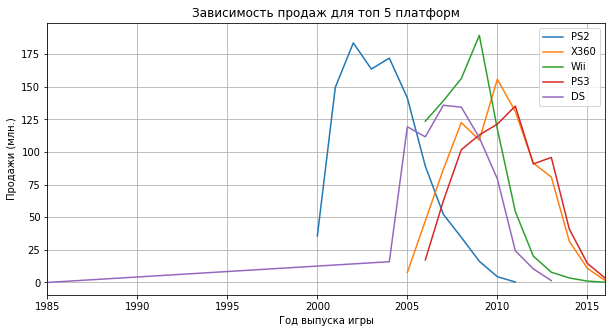

In [18]:
for platform in top_5_platform_list:
    (df[df['platform'] == platform]
    .groupby('year_of_release')['all_sales'].sum()
    .plot(grid=True, figsize=(10, 5))
    )

plt.title('Зависимость продаж для топ 5 платформ')
plt.xlabel('Год выпуска игры')
plt.ylabel('Продажи (млн.)')
plt.legend(top_5_platform_list)
plt.show()

<b>Вывод:</b>

По графику можно понять, что срок жизни платформы варируется около 10 лет.

### Данные за актуальный период

In [19]:
actual_df = df.query('year_of_release >= 2013')

In [20]:
actual_df_list = actual_df.groupby('platform')['all_sales'].agg('sum').sort_values(ascending=False).index
actual_df.pivot_table(index='platform')

,all_sales,critic_score,eu_sales,jp_sales,na_sales,other_sales,user_score,year_of_release
platform,,,,,,,,
3DS,0.452046,68.338028,0.102178,0.223795,0.126073,0.020726,6.976250,2014.287129
DS,0.177500,NaN,0.106250,0.000000,0.071250,0.015000,4.800000,2013.000000
PC,0.192963,75.550336,0.134180,0.000000,0.058783,0.015661,6.269677,2014.634921
PS3,0.448290,70.198347,0.196551,0.067681,0.184058,0.077594,6.348387,2014.066667
PS4,0.678036,72.091270,0.359923,0.040714,0.277398,0.123342,6.748249,2015.145408
PSP,0.051642,74.000000,0.002537,0.049104,0.000000,0.000597,5.850000,2013.238806
PSV,0.083045,71.636364,0.017039,0.051927,0.014078,0.009106,7.527273,2014.606145
Wii,0.545217,NaN,0.257826,0.002174,0.285217,0.048696,5.257143,2013.739130
WiiU,0.521217,71.642857,0.172609,0.094609,0.254000,0.040783,7.017500,2014.121739


<b>Вывод:</b>

Актуальные для расчетов данные было решено взять от 2013 года.

### Лидирующие платформы

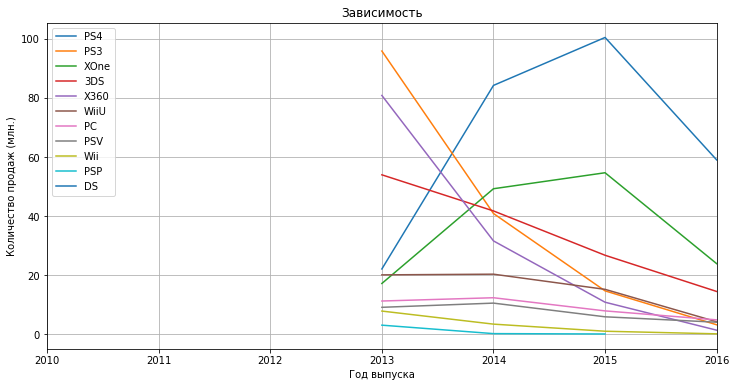

In [21]:
for platform in actual_df_list:
    (actual_df[actual_df['platform'] == platform]
     .groupby('year_of_release')['all_sales'].sum()
     .plot(grid=True, figsize=(12, 6)))
    
plt.title('Зависимость')
plt.xticks(range(2010, 2017))
plt.xlabel('Год выпуска')
plt.ylabel('Количество продаж (млн.)')
plt.legend(actual_df_list)
plt.show()

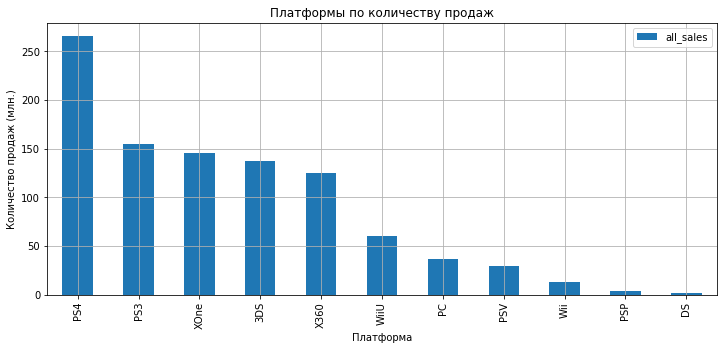

In [22]:
(
 actual_df.pivot_table(index='platform', values='all_sales', aggfunc='sum')
 .sort_values(by='all_sales', ascending=False)
 .plot(kind='bar', grid=True, figsize=(12, 5))
)

plt.title('Платформы по количеству продаж')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж (млн.)')
plt.show()

<b>Вывод</b>

Исходя из графиков было решено взять 3 платформы, которые предположительно будут существовать еще более 5 лет. Ими стали PS4, XBOX One и NINTENDO 3DS.

### График boxplot

In [23]:
platform = ['PS4', 'XOne', '3DS']
profitable_platform = actual_df.query('platform in @platform')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


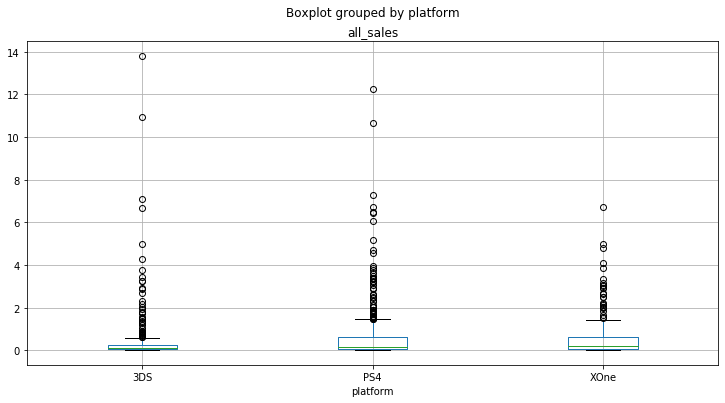

In [24]:
profitable_platform.boxplot('all_sales', by='platform', figsize=(12, 6))

### Диаграмма рассеяния

In [25]:
def diagramm(platform, score, color, ax):
    pivot = profitable_platform.query('platform == @platform')
    
    plot = (pivot.plot(kind='scatter', x=score, y='all_sales', color=color, subplots=True, ax=axes[ax]))

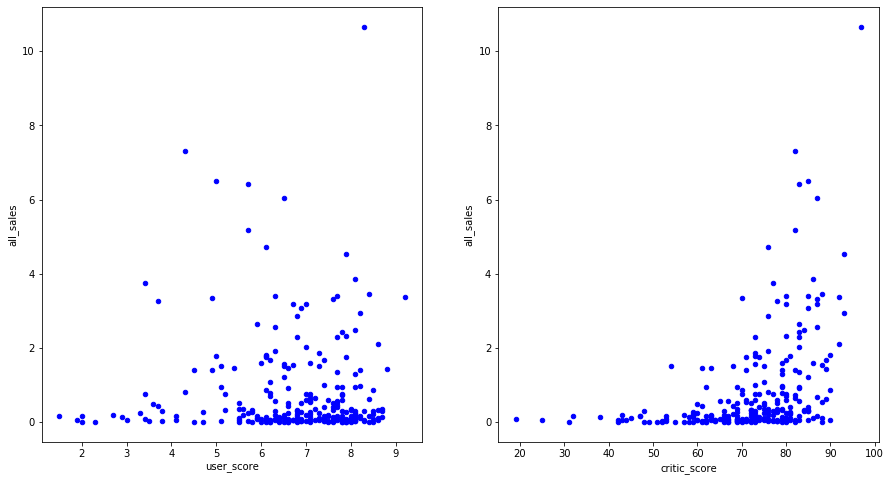

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

diagramm('PS4', 'user_score', 'blue', 0)
diagramm('PS4', 'critic_score', 'blue', 1)

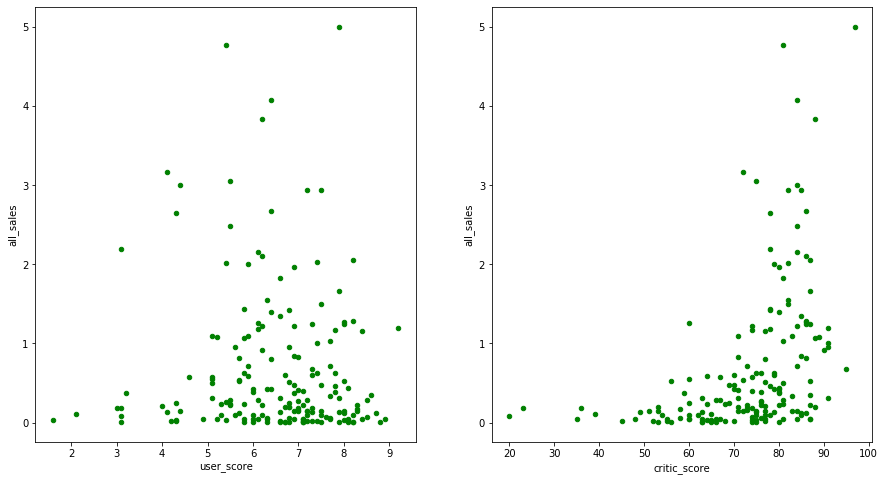

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

diagramm('XOne', 'user_score', 'green', 0)
diagramm('XOne', 'critic_score', 'green', 1)

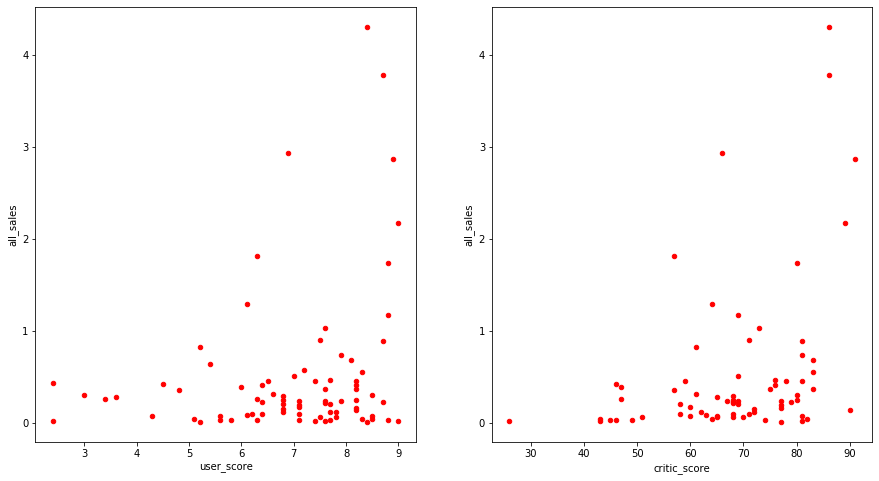

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

diagramm('3DS', 'user_score', 'red', 0)
diagramm('3DS', 'critic_score', 'red', 1)

In [29]:
profitable_platform['all_sales'].corr(profitable_platform['user_score'])

-0.011599045506063903

In [30]:
profitable_platform['all_sales'].corr(profitable_platform['critic_score'])

0.39557148411254645

<b>Вывод</b>

По графикам рассеяния можно сказать, что высокая оценка критиков больше влияет на продажи, чем высокая оценка пользователей. Но очень слабо прослеживается такая зависимость у NINTENDO 3DS. Там графики практически равны.<br><br>
Так же по коэффиценту кореляции можно подтвердить, что оценка пользователей не влияет на продажи, а оценка критиков имеет слабый вес.

### Жанры

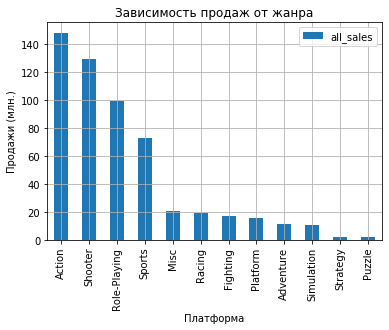

In [31]:
(
    profitable_platform.pivot_table(index='genre', values='all_sales', aggfunc='sum')
    .sort_values(by='all_sales', ascending=False)
    .plot(kind='bar', grid=True)
)

plt.title('Зависимость продаж от жанра')
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн.)')
plt.show()

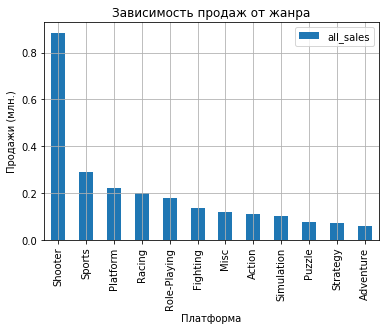

In [32]:
(
    profitable_platform.pivot_table(index='genre', values='all_sales', aggfunc='median')
    .sort_values(by='all_sales', ascending=False)
    .plot(kind='bar', grid=True)
)

plt.title('Зависимость продаж от жанра')
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн.)')
plt.show()

<b>Вывод:</b>

Преобладающим жанром во всем мире являются шутеры. Самым же не популярным - приключения.

## Портрет пользователя каждого региона

In [33]:
def top_5_per_region(groupby, region_sales, ax):
    pivot = actual_df.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False).head()
    colors = {'#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600'}
    plot = pivot.plot(kind='pie', colors=colors, wedgeprops={'edgecolor':"k"}, autopct='%.1f%%', subplots=True, ax=axes[ax])

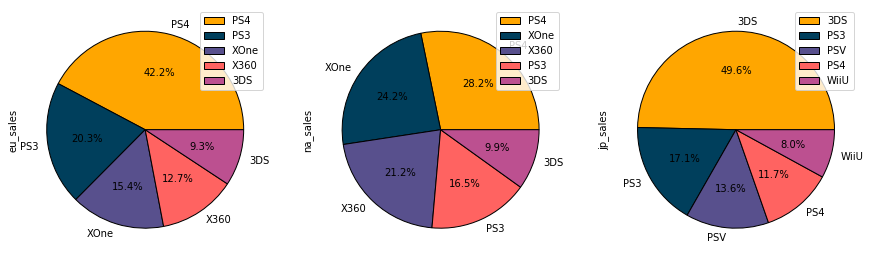

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))

top_5_per_region('platform', 'eu_sales', 0)
top_5_per_region('platform', 'na_sales', 1)
top_5_per_region('platform', 'jp_sales', 2)

<b>Вывод:</b>

В eu и na регионах преобладают одинаковые платформы лишь с разницей в популярности.В Японии же платформы отличаются и преобладают, зачастую, портативные платформы, такие как DS, 3DS, PSP.

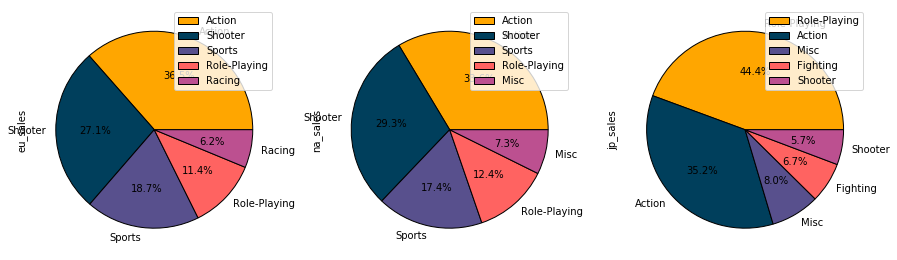

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))

top_5_per_region('genre', 'eu_sales', 0)
top_5_per_region('genre', 'na_sales', 1)
top_5_per_region('genre', 'jp_sales', 2)

<b>Вывод:</b>

Как было выявлено выше, самый популярный жанр в мире это экшн. Но в Японии этот жанр стоит на 2 месте сильно отставая от лидера - ролевых игр. В регионах eu и na же жанры практически совпадают даже в процентном соотношении, кроме пятой позиции.

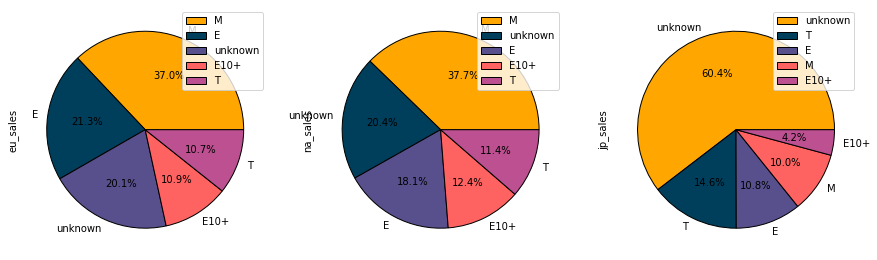

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))

top_5_per_region('rating', 'eu_sales', 0)
top_5_per_region('rating', 'na_sales', 1)
top_5_per_region('rating', 'jp_sales', 2)

<b>Вывод:</b>

Самыми продаваемыми играми в регионах EU и NA являются игры с рейтингом М и составляют больше трети от всех продаж. В регионе JP самыми продаваемыми играми являются игры без рейтинга. Более половины всех продаж. Вторую треть в регионах eu и na забирают игры с рейтингом E и без рейтинга. Остальное уходит на E10+ и T. В регионе JP остальные рейтинги приблизительно равны.<br><br>

## Проверка гипотез

Т.к. мы уже имеем гипотезы,
нам остается определить, к какой гипотезе они подходят. Нулевой или альтернативной.<br>
Нулевая гипотеза формируется со знаком равно, альтернативная ему противоречит.

<b>Нулевая гипотеза:</b> Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.<br>
<b>Альтернативная гипотеза:</b> Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [37]:
alpha = .05

In [38]:
sample_xbox_one = actual_df.query('platform == "XOne"')['user_score']
sample_xbox_one = sample_xbox_one.dropna()
sample_pc = actual_df.query('platform == "PC"')['user_score']
sample_pc = sample_pc.dropna()
 
results = stats.ttest_ind(sample_xbox_one, sample_pc, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


<b>Вывод:</b>

Результат превышает пороговое значение, значит оставляем нулевую гипотезу. Средние пользовательские рейтинги для XBOX One и PC одинаковые.

<b>Нулевая гипотеза:</b> Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.<br>
<b>Альтернативная гипотеза:</b> Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [39]:
sample_xbox_one = actual_df.query('genre == "Action"')['user_score']
sample_xbox_one = sample_xbox_one.dropna()
sample_pc = actual_df.query('genre == "Sports"')['user_score']
sample_pc = sample_pc.dropna()
 
results = stats.ttest_ind(sample_xbox_one, sample_pc, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.4460039700704315e-20
Отвергаем нулевую гипотезу


<b>Вывод:</b>

Результат не превышает пороговое значение, поэтому отметаем нулевую гипотезу и ориентируемся на альтернативную. Средние пользовательские рейтинги жанров Action и Sports различаются.

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Неплохо бы вывести сами средние, чтобы выяснить в какую сторону различие
</div>

## Общий вывод

<b>Данные:</b><br>
В таблице были обработаны данные, а именно:
- Названия столбцов были приведены к нижнему регистру
- Изменен тип данных в стобцах 'year_of_release' и 'user_score'
- Удалены некоторые данные в столбцах name(2 строки) и year_of_release(269 строк)
- Добавлен столбец с суммарными продажами

<b>Исследовательский анализ:</b><br>

   Был проведен анализ данных по популярности платформ. Были выявлены лидирующие платформы и ими стали PS4, XBOX One и NINTENDO 3DS. Подобран актуальный период с 2007 по примерному сроку жизни платформы. Были построены графики отношения отзывов к продажам. Отзывы критиков имеют больший вес, нежели оценки пользователей. Так же выявлены самые популярные жанры.

<b>Портрет пользователя по регионам:</b><br>

   Был построен портрет пользователя каждого региона. Для EU и NA эти портреты схожи, за малыми исключениями, а в Японии он сильно отличается. В JP регионе преобладают портативные платформы, когда как в других регионах стационарные. Популярный жанр это ролевой, когда как во всем мире - экшен. Так же треть продаж занимают игры с рейтингом для подростков, когда в других регионах менее 20%.

<b>Гипотезы:</b><br>
По имеющимся данным составили гипотезы, получилось что:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<b>Вывод:</b><br>

По изученным данным были выявлены критерии успешной видеоигры на 2017 год в мире:
- Лидирующие платформы PlayStation 4, XBox One, Nintendo 3DS
- Топ 3 самых прибыльных жанров по миру: Экшен, шутер, ролевые игры

Для региона EU:
- PS3, Xbox 360
- Action, Shooter
- Рейтинг Е, М

Для региона NA:
- Xbox 360, Wii
- Action, Shooter
- Рейтинг Е, М

Для региона JP:
- DS, 3DS
- Role-Playing, Action
- Рейтинг Е, Т